In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
bechdel_only = pd.read_csv('Bechdel Complete.csv')
print('Bechdel Only')
print(bechdel_only.head())
print(bechdel_only.info())
bechdel_imdb = pd.read_csv('Bechdel plus IMDB.csv')
print('Bechdel with IMDB Ratings')
print(bechdel_imdb.head())
print(bechdel_imdb.info())
bechdel_imdb_budget = pd.read_csv('Bechdel with IMDB and Budget.csv')
print('Bechdel with Ratings and Budget')
print(bechdel_imdb_budget.head())
print(bechdel_imdb_budget.info())

Bechdel Only
                                    title    imdbid  bechdel_binary  \
0                   Roundhay Garden Scene  392728.0               0   
1                          Pauvre Pierrot       3.0               0   
2                        Blacksmith Scene       5.0               0   
3  Execution of Mary, Queen of Scots, The  132134.0               0   
4           Tables Turned on the Gardener      14.0               0   

  bechdel_test  2 named women  talk to each other  not about men  year  
0         FAIL          False               False          False  1888  
1         FAIL          False               False          False  1892  
2         FAIL          False               False          False  1893  
3         FAIL          False               False          False  1895  
4         FAIL          False               False          False  1895  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 8 columns):
 #   Column     

<b>Background:</b>
<p>The Bechdel Test is a way of evaluating movies for inclusion of women. It was popularized by comic book writer Alison Bechdel in 1985. In order for a film to pass the Bechdel Test, it must fulfill 3 criteria:</p>
<ol type=1>
    <li>It must have at least two named female characters.</li>
    <li>Those characters must have at least one conversation with each other.</li>
    <li>The conversation must be about something other than a man.</li></ol>

<p>It was originally proposed as a way to show just how few popular movies actually pass this very low bar. Though it is woefully inadequate in some ways and better tests of inclusion and diversity are needed, the popularity and widespread use, as well as the simplicity of the test, mean that there is fairly comprehensive data on movies that pass or fail. The data here was taken from bechdel.com, which has a database of over 8000 films with their imdb ids and a pass/fail on each of the three criteria.</p>
    
    
    

PASS    0.575252
FAIL    0.424748
Name: bechdel_test, dtype: float64


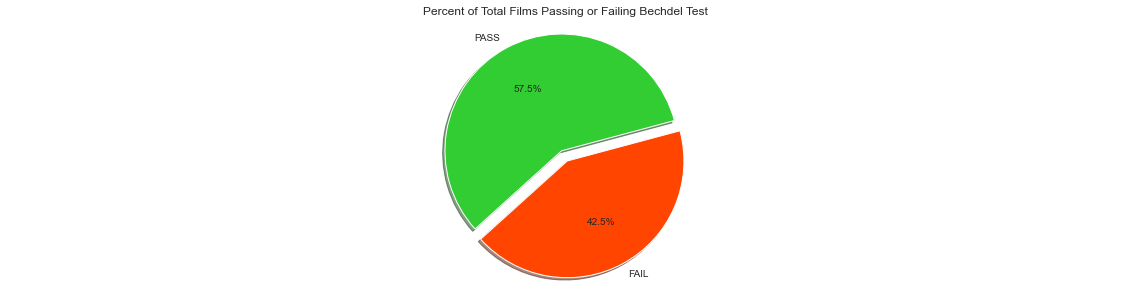

In [3]:
pass_rate = bechdel_only['bechdel_test'].value_counts(normalize=True)
print(pass_rate)

labels = 'PASS', 'FAIL'
explode = (0, 0.1)
colors = ['limegreen', 'orangered']
plt.pie(pass_rate, labels = labels, autopct='%1.1f%%', startangle= 15, shadow = True, colors= colors, explode=explode)
plt.axis('equal')
plt.title('Percent of Total Films Passing or Failing Bechdel Test')
plt.show()

Overall, 58% of the movies in the database pass the Bechdel Test, while 42% fail. These seem like positive numbers! However, when you consider how low the bar is, we'd like that number to be much, much higher. In fact, considering how easy it should be to pass, theoretically, we should be aiming for 100% of films made to pass the test. Additionally, it is important to keep in mind that this list comes from a moderated site (bechdeltest.com) based on user submissions, so there may be some bias towards watching and submitting movies more likely to pass the Bechdel Test.

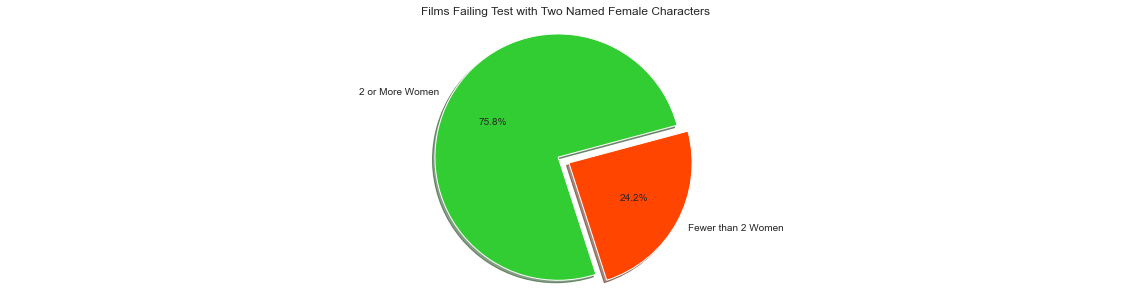

In [4]:
bechdel_fail = bechdel_only[bechdel_only["bechdel_test"] == "FAIL"]
pass_rate1 = bechdel_fail['2 named women'].value_counts(normalize=True)
labels = '2 or More Women', 'Fewer than 2 Women'
explode = (0, 0.1)
colors = ['limegreen', 'orangered']
plt.pie(pass_rate1, labels = labels, autopct='%1.1f%%', startangle= 15, shadow = True, colors= colors, explode=explode)
plt.axis('equal')
plt.title('Films Failing Test with Two Named Female Characters')
plt.show()

Of the films failing the test, over 75% do have at least two named female characters. 

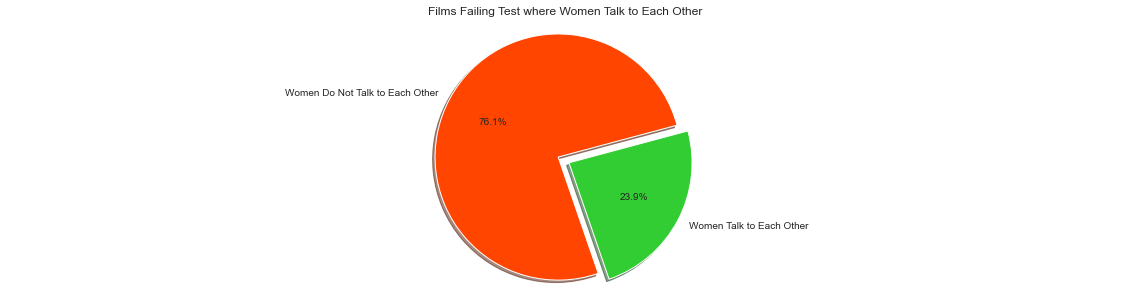

In [5]:
pass_rate2 = bechdel_fail['talk to each other'].value_counts(normalize=True)
labels = 'Women Do Not Talk to Each Other', 'Women Talk to Each Other'
explode = (0, 0.1)
colors = ['orangered', 'limegreen']
plt.pie(pass_rate2, labels = labels, autopct='%1.1f%%', startangle= 15, shadow = True, colors= colors, explode=explode)
plt.axis('equal')
plt.title('Films Failing Test where Women Talk to Each Other')
plt.show()

Criteria #2: Those women talk to each other, has a much lower pass rate. Relegated to two dimensional wives, girlfriends, and crushes, female characters in movies are often not allowed rich, complex lives, nor to they further the plot. They are seen primarily as accessories to the central male character(s).

Next, we'll look at whether the percentage of movies passing the test is going up or down over time.

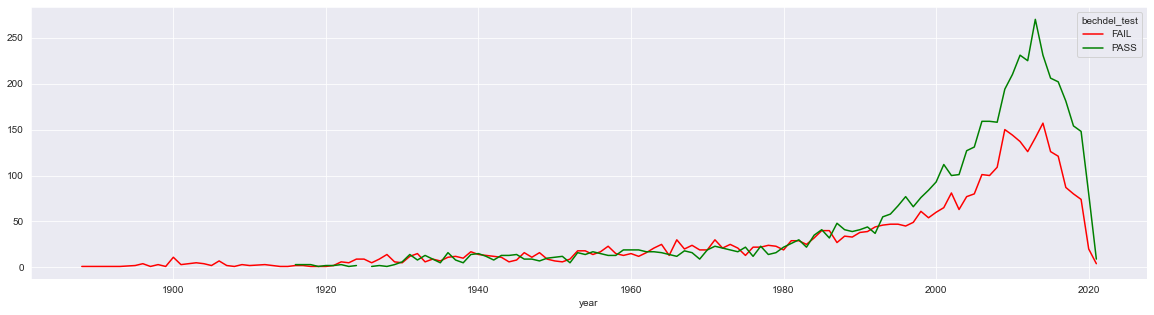

In [6]:
bechdel_time = bechdel_only.groupby(['year', 'bechdel_test']).bechdel_test.count() 
bechdel_time = bechdel_time.unstack(level='bechdel_test')
bechdel_time.plot(color=('red', 'green'))
plt.show()

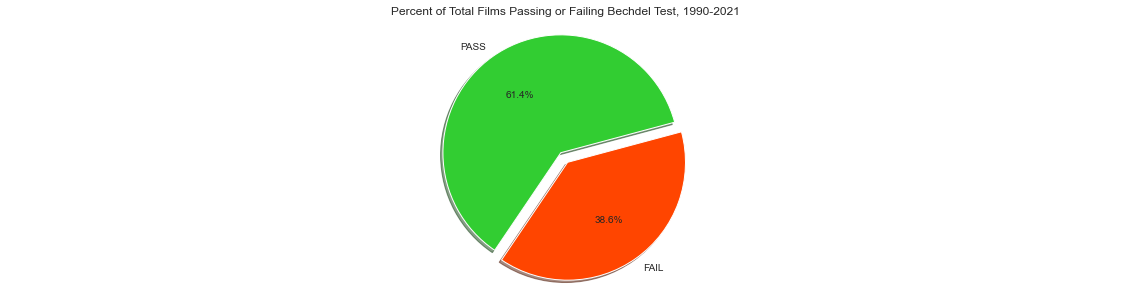

In [7]:
nineties_forward = bechdel_only[bechdel_only['year']>=1990]
pass_rate_modern = nineties_forward['bechdel_test'].value_counts(normalize=True)
labels = 'PASS', 'FAIL'
explode = (0, 0.1)
colors = ['limegreen', 'orangered']
plt.pie(pass_rate_modern, labels = labels, autopct='%1.1f%%', startangle= 15, shadow = True, colors= colors, explode=explode)
plt.axis('equal')
plt.title('Percent of Total Films Passing or Failing Bechdel Test, 1990-2021')
plt.show()

If we look at only movies from 1990 forward, the percentages get better, but still aren't anywhere close to 100% pass rate. 

<b>Genres most Likely to Pass the Bechdel Test</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Film-Noir'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Musical'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Romance'),
  Text(15, 0, 'Sci-Fi'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War')])

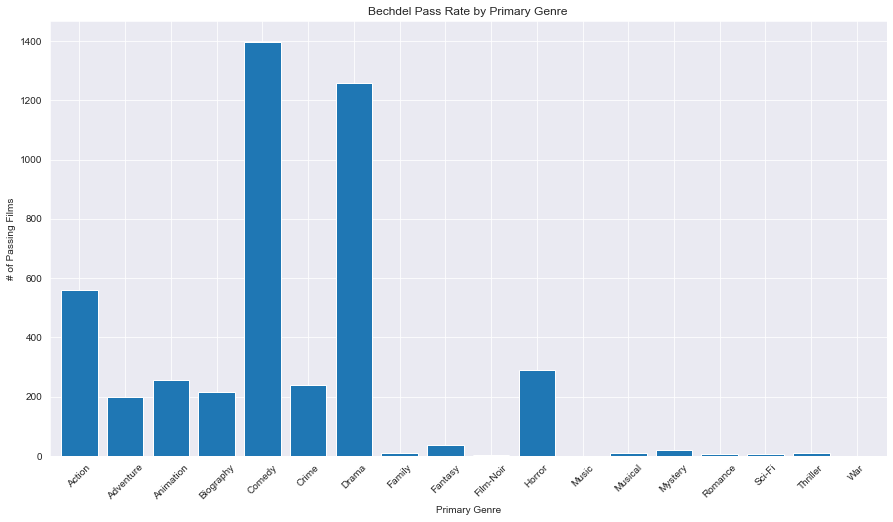

In [8]:
bechdel_pass_imdb = bechdel_imdb[bechdel_imdb['bechdel_test'] == 'PASS']
genre1p = bechdel_pass_imdb.groupby(['genre1'])['bechdel_test'].count()
genre1p.plot(kind='bar', title='Bechdel Pass Rate by Primary Genre', ylabel='# of Passing Films',
         xlabel='Primary Genre', figsize=(15, 8), width=0.8)
plt.xticks(rotation=45)

Based on primary listed genre, Comedy and Drama films are most likely to pass. Unfortunately, these do not map with the most popular in terms of ratings on IMDB. We'll see how these genres line up with box office success.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Film-Noir'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Musical'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Sci-Fi'),
  Text(15, 0, 'Thriller'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Western')])

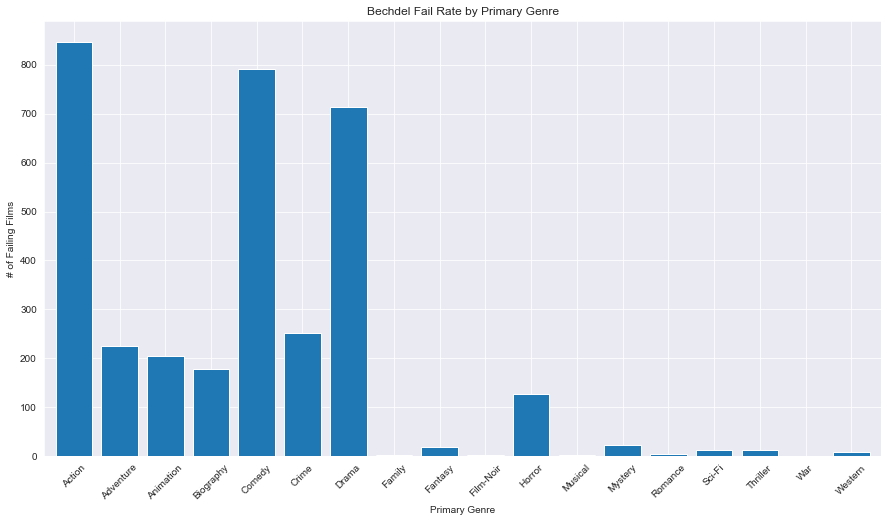

In [9]:
bechdel_fail_imdb = bechdel_imdb[bechdel_imdb['bechdel_test'] == 'FAIL']
genre1f = bechdel_fail_imdb.groupby(['genre1'])['bechdel_test'].count()
genre1f.plot(kind='bar', title='Bechdel Fail Rate by Primary Genre', ylabel='# of Failing Films',
         xlabel='Primary Genre', figsize=(15, 8), width=0.8)
plt.xticks(rotation=45)

Just as a secondary check, I ran the same chart for movies that fail the Bechdel Test. Here we see Action as the genre most likely to fail. Comedy and Drama are high here as well, which means there are just a lot of Comedy and Drama films made. No surprises there. Action films have 800 failing vs only 500 or so passing, while Comedy and Drama films have nearly double the amount passing vs. failing. Note to self: will want to make a stacked bar chart  here in Tableau. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, ' Action'),
  Text(1, 0, ' Adventure'),
  Text(2, 0, ' Animation'),
  Text(3, 0, ' Biography'),
  Text(4, 0, ' Comedy'),
  Text(5, 0, ' Crime'),
  Text(6, 0, ' Drama'),
  Text(7, 0, ' Family'),
  Text(8, 0, ' Fantasy'),
  Text(9, 0, ' Film-Noir'),
  Text(10, 0, ' History'),
  Text(11, 0, ' Horror'),
  Text(12, 0, ' Music'),
  Text(13, 0, ' Musical'),
  Text(14, 0, ' Mystery'),
  Text(15, 0, ' Romance'),
  Text(16, 0, ' Sci-Fi'),
  Text(17, 0, ' Sport'),
  Text(18, 0, ' Thriller'),
  Text(19, 0, ' War'),
  Text(20, 0, ' Western')])

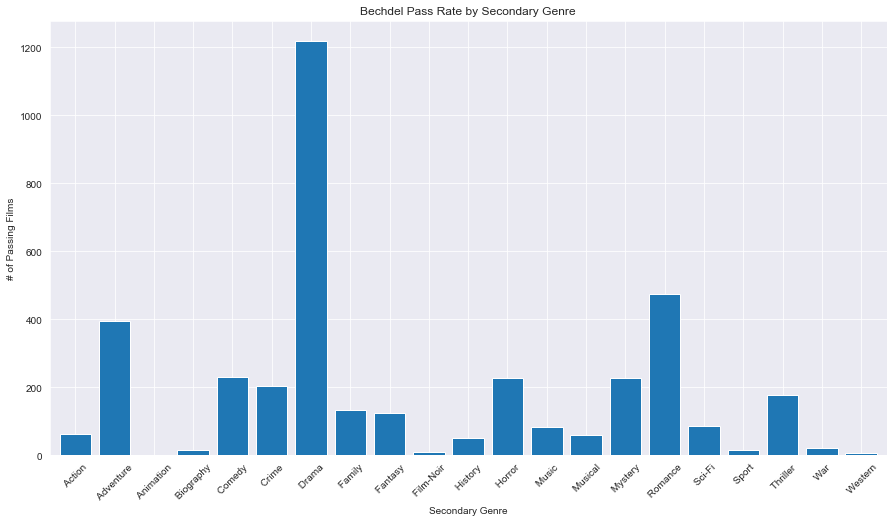

In [10]:
bechdel_pass_imdb = bechdel_imdb[bechdel_imdb['bechdel_test'] == 'PASS']
genre2 = bechdel_pass_imdb.groupby(['genre2'])['bechdel_test'].count()
genre2.plot(kind='bar', title='Bechdel Pass Rate by Secondary Genre', ylabel='# of Passing Films',
         xlabel='Secondary Genre', figsize=(15, 8), width=0.8)
plt.xticks(rotation=45)

Based on secondary genre, Drama is the clear winner, with Romance and Adventure also intriguing. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Adventure'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Crime'),
  Text(3, 0, ' Drama'),
  Text(4, 0, ' Family'),
  Text(5, 0, ' Fantasy'),
  Text(6, 0, ' Film-Noir'),
  Text(7, 0, ' History'),
  Text(8, 0, ' Horror'),
  Text(9, 0, ' Music'),
  Text(10, 0, ' Musical'),
  Text(11, 0, ' Mystery'),
  Text(12, 0, ' Romance'),
  Text(13, 0, ' Sci-Fi'),
  Text(14, 0, ' Sport'),
  Text(15, 0, ' Thriller'),
  Text(16, 0, ' War'),
  Text(17, 0, ' Western')])

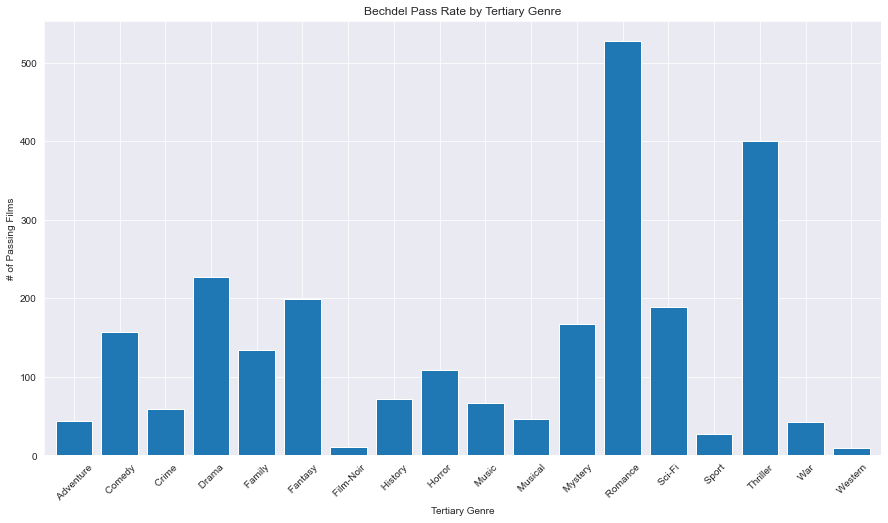

In [11]:
bechdel_pass_imdb = bechdel_imdb[bechdel_imdb['bechdel_test'] == 'PASS']
genre3 = bechdel_pass_imdb.groupby(['genre3'])['bechdel_test'].count()
genre3.plot(kind='bar', title='Bechdel Pass Rate by Tertiary Genre', ylabel='# of Passing Films',
         xlabel='Tertiary Genre', figsize=(15, 8), width=0.8)
plt.xticks(rotation=45)

Based on tertirary genre, Romance and Thriller films have the highest number of passes. 

<b>Directors Likely to Make Films Passing Bechdel Test</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Tim Burton'),
  Text(1, 0, 'Chris Columbus'),
  Text(2, 0, 'Ridley Scott'),
  Text(3, 0, 'Steven Soderbergh'),
  Text(4, 0, 'Wes Craven'),
  Text(5, 0, 'Woody Allen'),
  Text(6, 0, 'Steven Spielberg'),
  Text(7, 0, 'Adam Shankman'),
  Text(8, 0, 'Catherine Hardwicke'),
  Text(9, 0, 'Clint Eastwood'),
  Text(10, 0, 'John Madden'),
  Text(11, 0, 'Lana Wachowski, Lilly Wachowski'),
  Text(12, 0, 'Michael Bay'),
  Text(13, 0, 'Paul Feig'),
  Text(14, 0, 'Paul W.S. Anderson'),
  Text(15, 0, 'Robert Zemeckis'),
  Text(16, 0, 'Roland Emmerich'),
  Text(17, 0, 'Zack Snyder'),
  Text(18, 0, 'David Cronenberg'),
  Text(19, 0, 'Denis Villeneuve')])

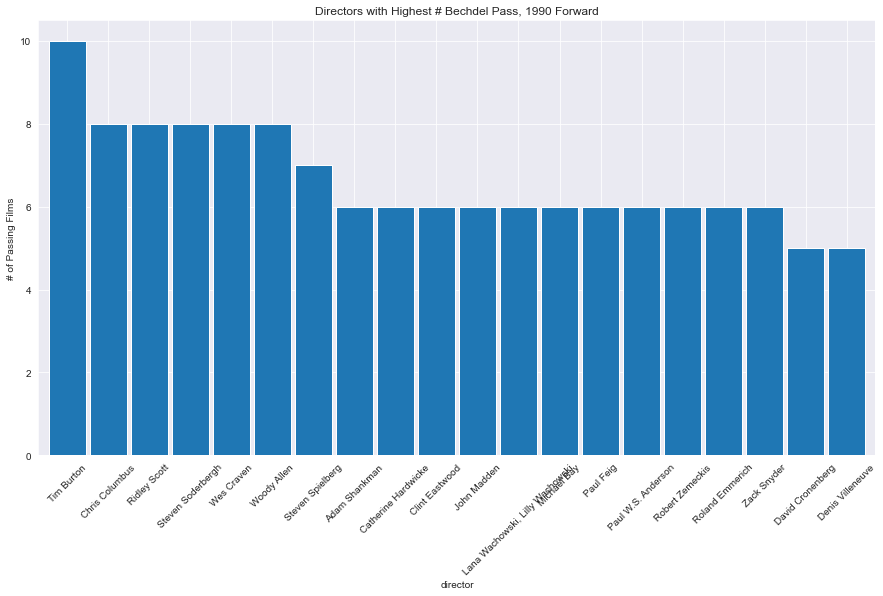

In [12]:
bechdel_pass_budget = bechdel_imdb_budget[bechdel_imdb_budget['bechdel_test'] == 'PASS']
bechdel_pass_director = bechdel_pass_budget[bechdel_pass_budget['year']>=1990]
director = bechdel_pass_director.groupby(['director'])['bechdel_test'].count().nlargest(20)
director.plot(kind='bar', title='Directors with Highest # Bechdel Pass, 1990 Forward', ylabel='# of Passing Films',
         xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)


Top 20 directors in terms of # of films passing Bechdel test 1990 forward. Filtered for 1990 because we want to target directors who are still active and alive.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Ron Howard'),
  Text(1, 0, 'Martin Campbell'),
  Text(2, 0, 'Steven Spielberg'),
  Text(3, 0, 'Christopher Nolan'),
  Text(4, 0, 'Clint Eastwood'),
  Text(5, 0, 'Steven Soderbergh'),
  Text(6, 0, 'Antoine Fuqua'),
  Text(7, 0, 'Bryan Singer'),
  Text(8, 0, 'Joel Schumacher'),
  Text(9, 0, 'Peter Jackson'),
  Text(10, 0, 'Brett Ratner'),
  Text(11, 0, 'David Fincher'),
  Text(12, 0, 'Doug Liman'),
  Text(13, 0, 'Guy Ritchie'),
  Text(14, 0, 'Jay Roach'),
  Text(15, 0, 'Martin Scorsese'),
  Text(16, 0, 'Peter Segal'),
  Text(17, 0, 'Ridley Scott'),
  Text(18, 0, 'Robert Zemeckis'),
  Text(19, 0, 'Shawn Levy')])

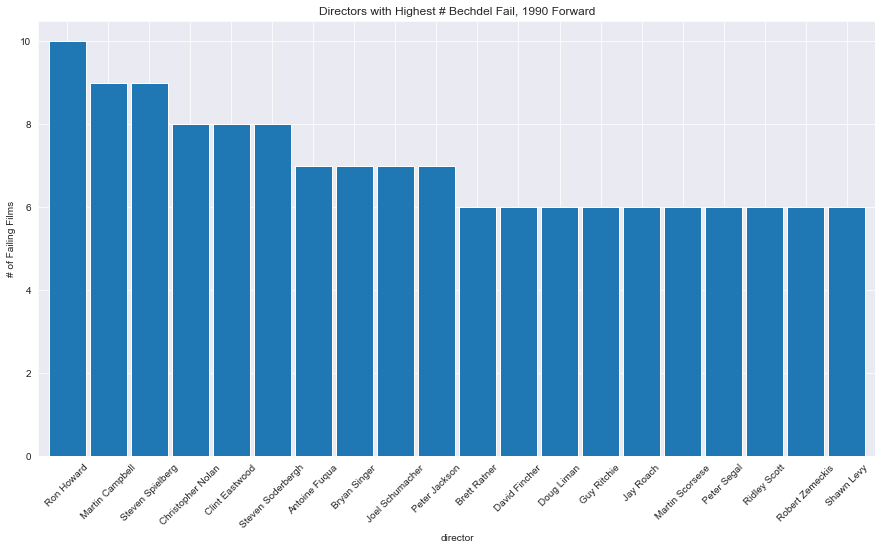

In [13]:
bechdel_fail_budget = bechdel_imdb_budget[bechdel_imdb_budget['bechdel_test'] == 'FAIL']
bechdel_fail_director = bechdel_fail_budget[bechdel_fail_budget['year']>=1990]
directorf = bechdel_fail_director.groupby(['director'])['bechdel_test'].count().nlargest(20)
directorf.plot(kind='bar', title='Directors with Highest # Bechdel Fail, 1990 Forward', ylabel='# of Failing Films',
         xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

Running the director list again vs. movies that fail, I was pleased to see that there is actually not a lot of crossover. Some prolific directors will be likely to direct many that pass and many that fail, but there is a solid list of directors with higher numbers of passes than fails. These should be on our short list. 

<b>Production Companies Likely to Make Films Passing Bechdel Test</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Universal Pictures'),
  Text(1, 0, 'Columbia Pictures'),
  Text(2, 0, 'Warner Bros.'),
  Text(3, 0, 'Paramount Pictures'),
  Text(4, 0, 'New Line Cinema'),
  Text(5, 0, 'Twentieth Century Fox'),
  Text(6, 0, 'Walt Disney Pictures'),
  Text(7, 0, 'DreamWorks'),
  Text(8, 0, 'Fox Searchlight Pictures'),
  Text(9, 0, 'Screen Gems'),
  Text(10, 0, 'Dimension Films'),
  Text(11, 0, 'Fox 2000 Pictures'),
  Text(12, 0, 'Summit Entertainment'),
  Text(13, 0, 'Lionsgate'),
  Text(14, 0, 'Metro-Goldwyn-Mayer (MGM)'),
  Text(15, 0, 'Focus Features'),
  Text(16, 0, 'Miramax'),
  Text(17, 0, 'Touchstone Pictures'),
  Text(18, 0, 'Blumhouse Productions'),
  Text(19, 0, 'DreamWorks Animation')])

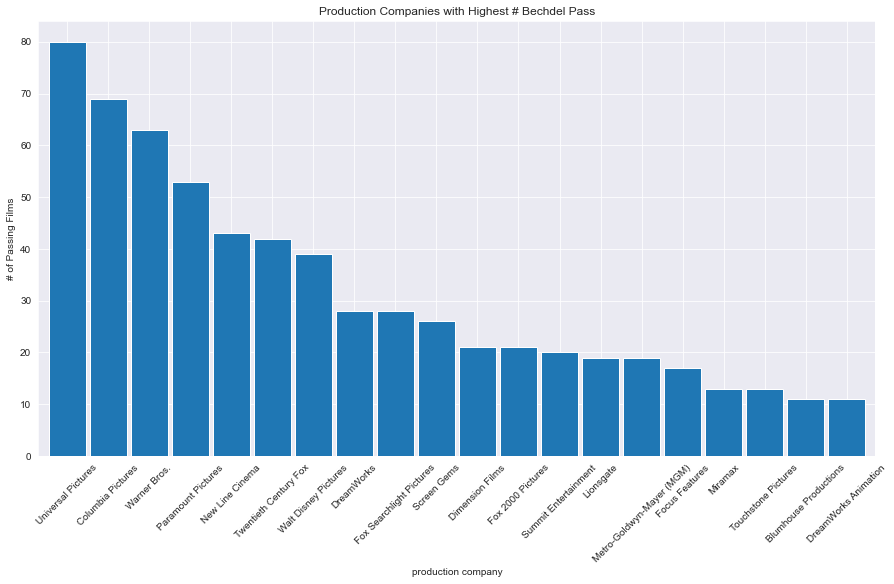

In [14]:
bechdel_pass_prod = bechdel_pass_budget[bechdel_pass_budget['year']>=2000]
prod_com = bechdel_pass_prod.groupby(['production_company'])['bechdel_test'].count().nlargest(20)
prod_com.plot(kind='bar', title='Production Companies with Highest # Bechdel Pass', ylabel='# of Passing Films',
         xlabel='production company', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

Results filtered for year 2000 and forward so we can study companies making current films. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Warner Bros.'),
  Text(1, 0, 'Universal Pictures'),
  Text(2, 0, 'Columbia Pictures'),
  Text(3, 0, 'Paramount Pictures'),
  Text(4, 0, 'Twentieth Century Fox'),
  Text(5, 0, 'New Line Cinema'),
  Text(6, 0, 'Summit Entertainment'),
  Text(7, 0, 'DreamWorks'),
  Text(8, 0, 'Walt Disney Pictures'),
  Text(9, 0, 'Metro-Goldwyn-Mayer (MGM)'),
  Text(10, 0, 'Focus Features'),
  Text(11, 0, 'Lionsgate'),
  Text(12, 0, 'Touchstone Pictures'),
  Text(13, 0, 'DreamWorks Animation'),
  Text(14, 0, 'Fox 2000 Pictures'),
  Text(15, 0, 'Fox Searchlight Pictures'),
  Text(16, 0, 'Screen Gems'),
  Text(17, 0, 'Revolution Studios'),
  Text(18, 0, 'CBS Films'),
  Text(19, 0, 'EuropaCorp')])

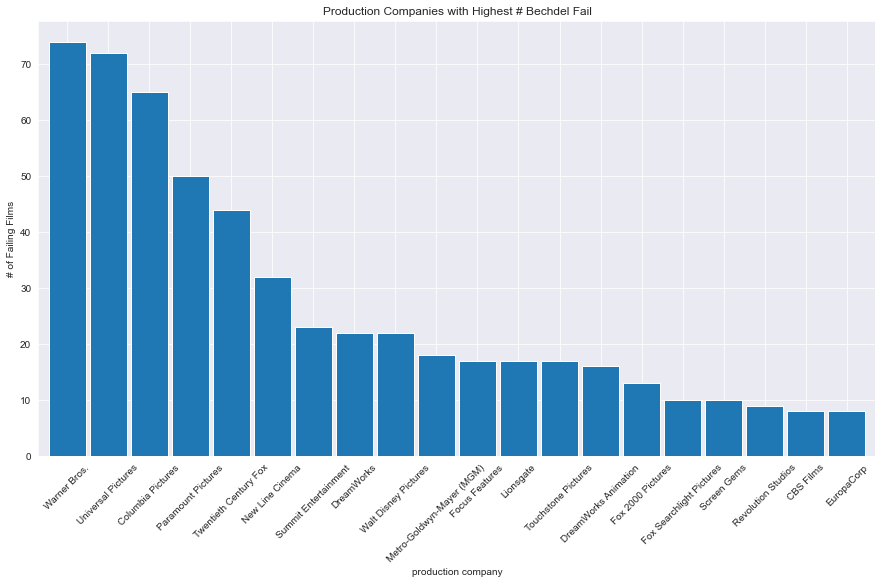

In [15]:
bechdel_fail_prod = bechdel_fail_budget[bechdel_fail_budget['year']>=2000]
prod_comf = bechdel_fail_prod.groupby(['production_company'])['bechdel_test'].count().nlargest(20)
prod_comf.plot(kind='bar', title='Production Companies with Highest # Bechdel Fail', ylabel='# of Failing Films',
         xlabel='production company', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

Though  many of the large production companies seem to have just as many films failing as passing, Dimension Films, Miramax, and Blumhouse Productions are all in the top 20 in regards to number of passing films but not in the top 20 for failing films. This is encouraging and these companies warrant a closer look. 

<b>Writers Likely to Write Scripts that Pass the Bechdel Test</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Woody Allen'),
  Text(1, 0, 'Lilly Wachowski, Lana Wachowski'),
  Text(2, 0, 'Paul W.S. Anderson'),
  Text(3, 0, 'Jonathan Aibel, Glenn Berger'),
  Text(4, 0, 'Rhett Reese, Paul Wernick'),
  Text(5, 0, 'Richard Curtis'),
  Text(6, 0, 'Christopher Markus, Stephen McFeely'),
  Text(7, 0, 'Diablo Cody'),
  Text(8, 0, 'Josh Appelbaum, André Nemec'),
  Text(9, 0, 'Kevin Smith'),
  Text(10, 0, 'Luc Besson'),
  Text(11, 0, 'M. Night Shyamalan'),
  Text(12, 0, 'Melissa Rosenberg, Stephenie Meyer'),
  Text(13, 0, 'Mike Leigh'),
  Text(14, 0, 'Nicole Holofcener'),
  Text(15, 0, 'Abby Kohn, Marc Silverstein'),
  Text(16, 0, "Andrew Jay Cohen, Brendan O'Brien"),
  Text(17, 0, 'Cameron Crowe'),
  Text(18, 0, 'Christina Hodson'),
  Text(19, 0, 'Christopher Guest, Eugene Levy')])

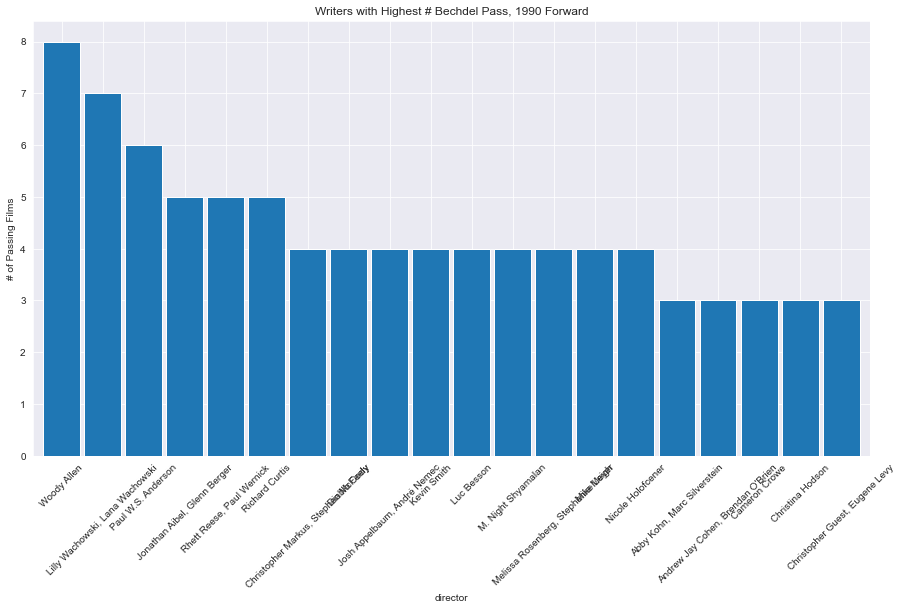

In [16]:
bechdel_pass_budget = bechdel_imdb_budget[bechdel_imdb_budget['bechdel_test'] == 'PASS']
bechdel_pass_writer = bechdel_pass_budget[bechdel_pass_budget['year']>=1990]
writer_pass = bechdel_pass_writer.groupby(['writer'])['bechdel_test'].count().nlargest(20)
writer_pass.plot(kind='bar', title='Writers with Highest # Bechdel Pass, 1990 Forward', ylabel='# of Passing Films',
         xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Luc Besson, Robert Mark Kamen'),
  Text(1, 0, 'Fran Walsh, Philippa Boyens'),
  Text(2, 0, 'Joel Coen, Ethan Coen'),
  Text(3, 0, 'Andrew Niccol'),
  Text(4, 0, 'M. Night Shyamalan'),
  Text(5, 0, 'Christopher Nolan'),
  Text(6, 0, 'Ethan Coen, Joel Coen'),
  Text(7, 0, 'Guillermo del Toro, Guillermo del Toro'),
  Text(8, 0, 'Guy Ritchie'),
  Text(9, 0, 'Ice Cube, DJ Pooh'),
  Text(10, 0, 'Jim Thomas, John Thomas'),
  Text(11, 0, 'Kevin Smith'),
  Text(12, 0, 'Neal Purvis, Robert Wade'),
  Text(13, 0, 'Phil Hay, Matt Manfredi'),
  Text(14, 0, 'Scott Neustadter, Michael H. Weber'),
  Text(15, 0, 'Steven Knight'),
  Text(16, 0, 'William Shakespeare, Kenneth Branagh'),
  Text(17, 0, 'Adam Cooper, Bill Collage'),
  Text(18, 0, 'Alejandro Amenábar, Mateo Gil'),
  Text(19, 0, 'Alex Garland')])

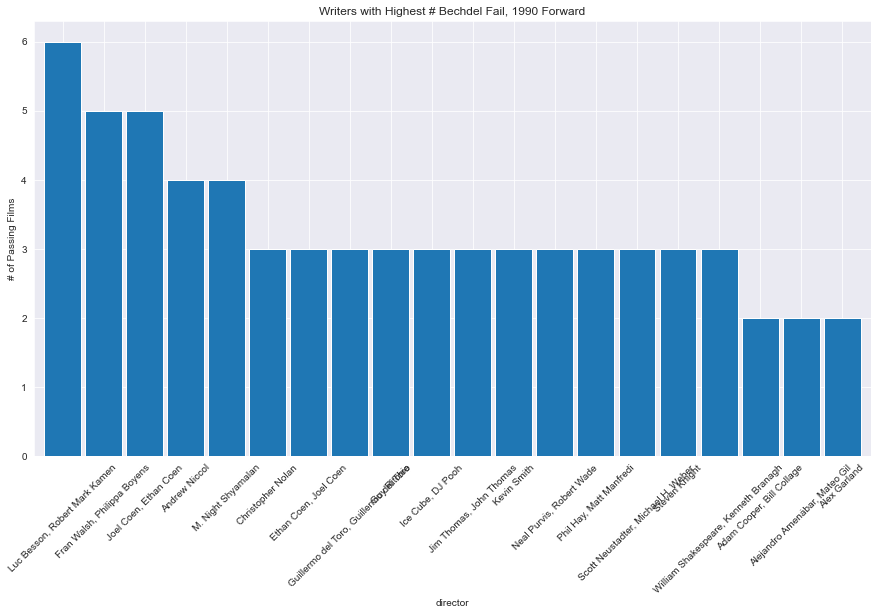

In [17]:
bechdel_fail_budget = bechdel_imdb_budget[bechdel_imdb_budget['bechdel_test'] == 'FAIL']
bechdel_fail_writer = bechdel_fail_budget[bechdel_fail_budget['year']>=1990]
writer_fail = bechdel_fail_writer.groupby(['writer'])['bechdel_test'].count().nlargest(20)
writer_fail.plot(kind='bar', title='Writers with Highest # Bechdel Fail, 1990 Forward', ylabel='# of Passing Films',
         xlabel='director', figsize=(15, 8), width=0.9)
plt.xticks(rotation=45)

Not a lot of crossover between writers who have many scripts that pass vs. fail. We're going to stay away from Woody Allen for obvious reasons, but the others in the top 20 are all prime candidates when shopping scripts. 

<b>Insights Based on Bechdel Pass/Fail Rates Overall:</b>
<ul>
    <li>The proportion of movies passing the test has improved dramatically over time but is nowhere near 100%</li>
    <li>The majority of films failing the Bechdel Test do have at least two named characters who talk to each other</li>
    <li>The majority of films failing the Bechdel test have female characters that talk only about men, and are primarily accessories to the central male character(s).</li>
</ul>

<b>Genres:</b>
<ul>
    <li>Comedy and Drama are the primary genres with the highest proportion of passing films</li>
    <li>Action has the highest proportion of failing films</li>
    <li>Drama, Romance, and Thriller films also have high pass rates for secondary/tertiary genre listing</li>
</ul>

<b>Directors:</b>
<ul>
    <li>There is little crossover between the list of directors with the highest number of movies that pass and the list of directors with the highest number of movies that fail.</li>
    <li>Removing the 5 who are in both lists gives us a shortlist of 14 directors that we will compare with profit margins and box office returns</li>
    <li>Removing Woody Allen due to his problematic history with women gives us a shortlist of 13</li>
</ul>

<b>Shortlist of Directors with Highest Number of Films Passing the Bechdel Test</b>
<ul class="dashed">
    <li>Tim Burton</li>
    <li>Chris Columbus</li>
    <li>Wes Craven</li>
    <li>Adam Shankman</li>
    <li>Catherine Hardwicke</li>
    <li>John Madden</li>
    <li>The Wachowski Sisters</li>
    <li>Michael Bay</li>
    <li>Paul Feig</li>
    <li>Paul Anderson</li>
    <li>Roland Emmerich</li>
    <li>Zack Snyder</li>
    <li>David Cronenberg</li>
    <li>Denis Villeneuve</li>
</ul>
<p>It is worth noting that there are only two directors on this list who identify as female, further evidence of the dearth of women directors in Hollywood.</p>

<b>Writers:</b>
<ul>
    <li>There is even less crossover between the list of writers with the highest number of movies that pass vs. those with the highest number of movies that fail</li>
    <li>Removing crossovers gives us a shortlist of 17 writers</li>
    <li>There are many more women on the writer shortlist, which is encouraging</li>
</ul>

<b>Shortlist of Writers with Highest Number of Films Passing the Bechdel Test</b>
<ul class="dashed">
    <li>The Wachowski Sisters</li>
    <li>Paul W.S. Anderson</li>
    <li>Jonathan Aibel, Glenn Berger</li>
    <li>Rhett Reese, Paul Wernick</li>
  <li>Richard Curtis</li>
  <li>Christopher Markus, Stephen McFeely</li>
  <li>Diablo Cody</li>
 <li>Josh Appelbaum, André Nemec</li>
 <li>Luc Besson</li>
  <li>Melissa Rosenberg, Stephenie Meyer</li>
  <li>Mike Leigh</li>
 <li>Nicole Holofcener</li>
   <li>Abby Kohn, Marc Silverstein</li>
  <li>Andrew Jay Cohen, Brendan O'Brien</li>
 <li>Cameron Crowe</li>
 <li>Christina Hodson</li>
  <li>Christopher Guest, Eugene Levy</li>
  
<b>Last but not least, Production Companies:</b>
    <ul>
        <li>I filtered for films made in the year 2000 and after so we can get an idea of films being made by contemporary companies</li>
        <li>The goal is to find companies that are of similar size and budget to Savage productions and likely to make films that pass the Bechdel Test so we can investigate their successes and failures in greater detail. This competetive research will be a later phase of the project</li>
        <li>Of those that had the highest number of films passing, only three were not also on the list of highest number of films failing:</li>
        <ul>
            <li>Dimension Films</li>
            <li>Miramax</li>
            <li>Blumhouse Productions</li>
        </ul>
        <li>We will focus our phase 2 competitive research on these three production companies   
        